# Workshop 4

Starter code for workshop 4. You should have seen most of it before, but make sure you understand what it is doing!

In [440]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [441]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [442]:
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

(569, 30)
(569,)
(569, 31)


In [443]:
print(f'Features names are: {data.feature_names}')
print(f'Label names are: {data.target_names}')
# We want to consider malignant as the 'positive' class 
#  - otherwise interpretation gets harder as a positive test in medicine corresponds to more severe disease

Features names are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label names are: ['malignant' 'benign']


In [444]:
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])

Your code starts here...

In [445]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [446]:
## Note that the mean of the target column gives the percentage of samples with target=1 (i.e. 37% has target=1, and so 63% have target=0)
## If there were more classes it would be important to determine and display the relevant proportions for all classes in another way

In [447]:
print(df.count())

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
target                     569
dtype: int64


In [448]:
print(np.sum(df.isna()))

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


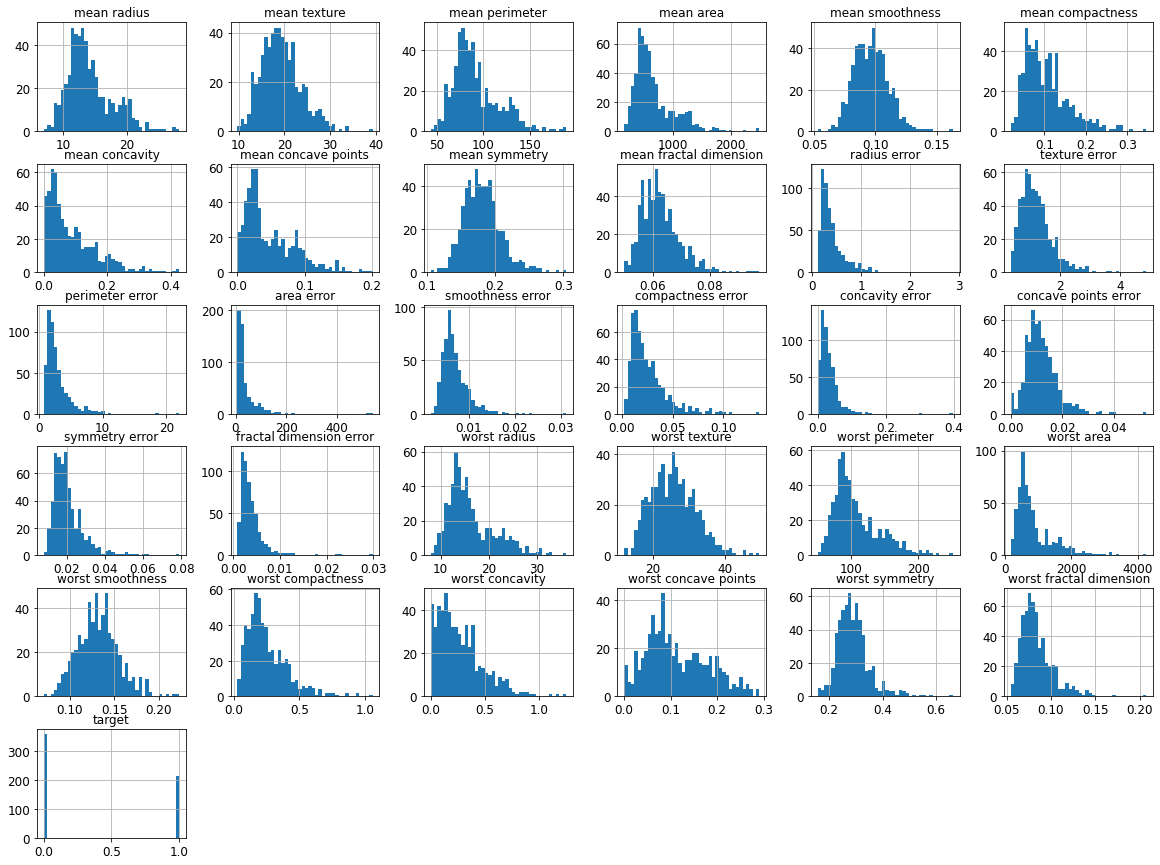

In [449]:
dummy = df.hist(bins=40,figsize=(20,15))

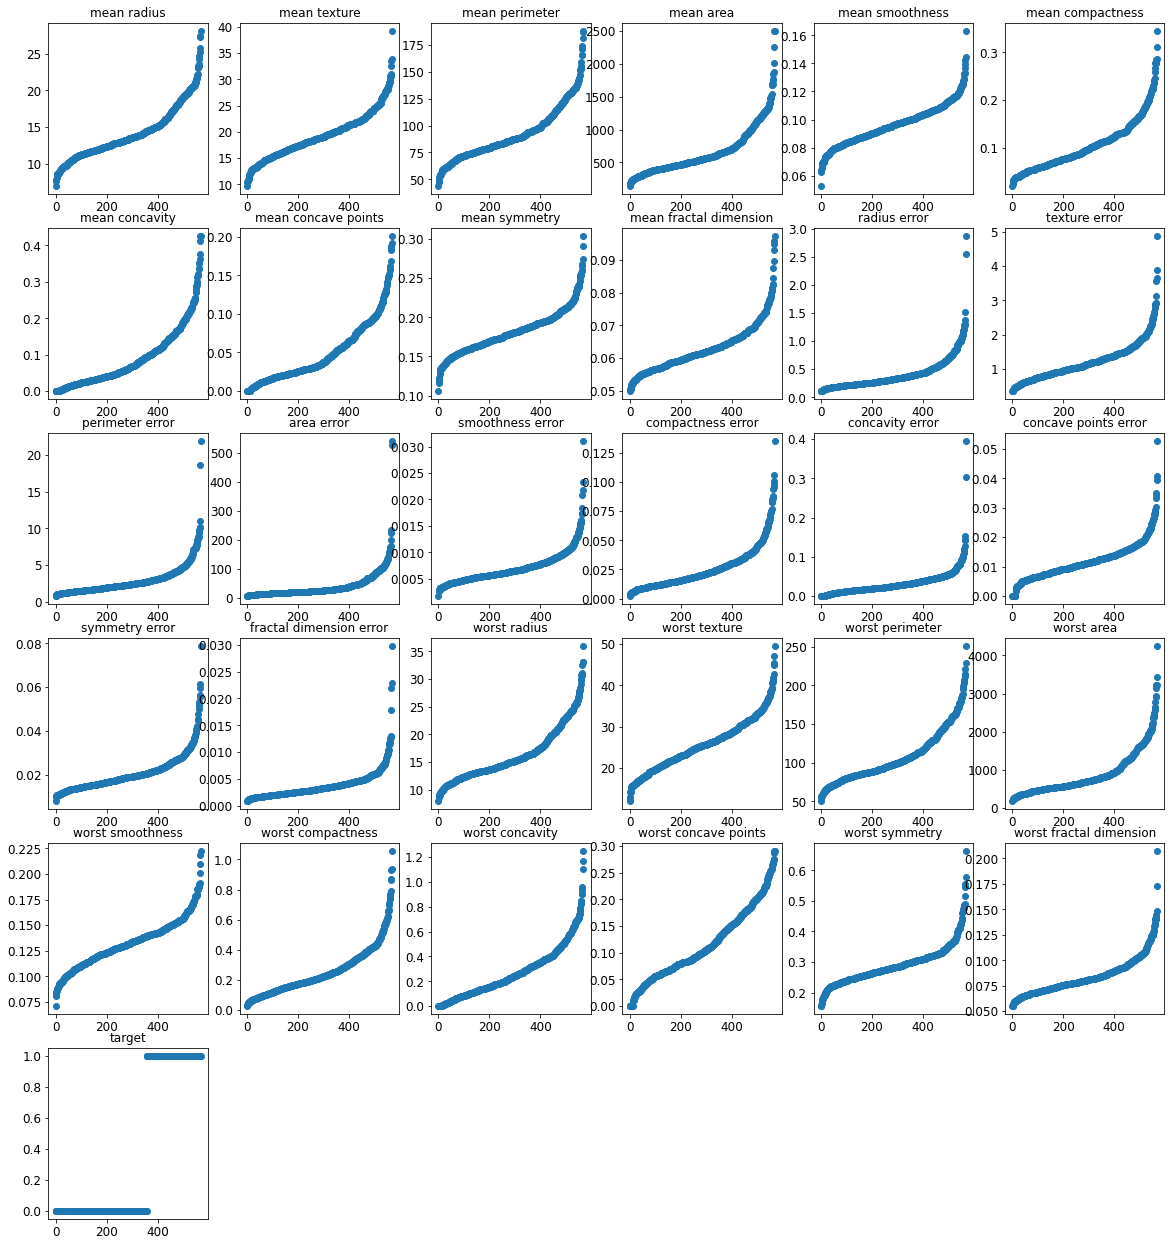

In [450]:
plt.figure(figsize=(20,22))
for n in range(fullarray.shape[1]):
    plt.subplot(6,6,n+1)
    plt.plot(np.sort(fullarray[:,n]),'o')
    plt.title(df.columns[n])
plt.show()

# Splitting into separate datasets

In [451]:
from sklearn.model_selection import train_test_split

bigtrain_set, test_set = train_test_split(fullarray, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42)

In [452]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print([X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape])

[(364, 30), (364,), (114, 30), (114,), (91, 30), (91,)]


# Pipeline

In [453]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ??? ])

# SGD Classifier

In [454]:
from sklearn.linear_model import SGDClassifier

sgd_pl = Pipeline([ ('preproc',preproc_pl), ('sgd',SGDClassifier(loss='log')) ])
sgd_pl.fit(X_train,y_train)
y_val_pred = sgd_pl.predict(X_val)
y_val_prob = sgd_pl.predict_proba(X_val)
y_val_prob = y_val_prob[:,1]   # just take the positive class probabilities

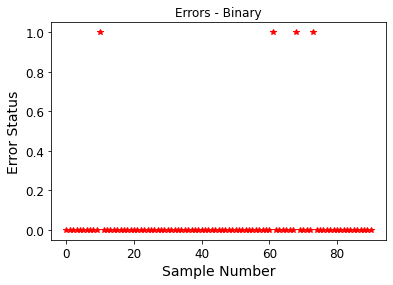

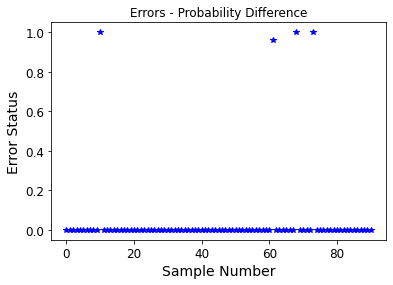

In [455]:
plt.plot(np.abs(y_val - y_val_pred),'r*')
plt.xlabel('Sample Number')
plt.ylabel('Error Status')
plt.title('Errors - Binary')
plt.show()
plt.plot(np.abs(y_val - y_val_prob),'b*')
plt.xlabel('Sample Number')
plt.ylabel('Error Status')
plt.title('Errors - Probability Difference')
plt.show()

In [456]:
from sklearn.metrics import confusion_matrix

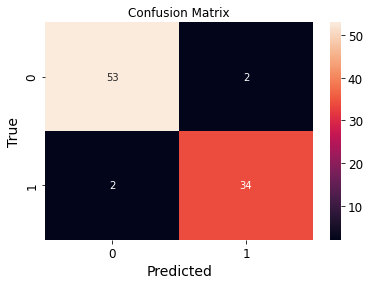

In [457]:
cmat = confusion_matrix(y_true=??, y_pred=y_val_pred)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

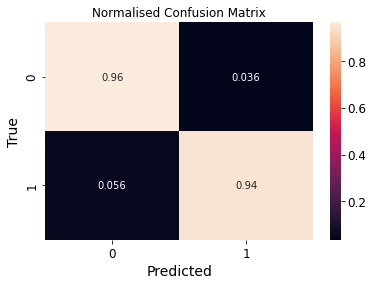

In [458]:
cmat = confusion_matrix(y_true=??, y_pred=y_val_pred, ???)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix')
plt.show()

In [459]:
from sklearn.metrics import accuracy_score

sgd_acc = accuracy_score(y_true = ??, y_pred = y_val_pred)
print(f'Accuracy for SGD is {sgd_acc}')

Accuracy for SGD is 0.9560439560439561


In [460]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_true = ??, y_pred = y_val_pred)
recl = recall_score(y_true = ??, y_pred = y_val_pred)
print(f'Precision & Recall are {prec} and {recl}')

Precision & Recall are 0.9444444444444444 and 0.9444444444444444


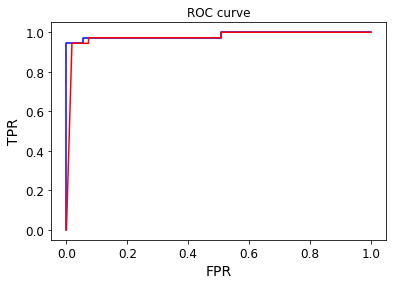

In [461]:
from sklearn.metrics import ???, auc

fpr, tpr, thresholds = ???(y_val, y_val_prob, pos_label=1)
plt.plot(fpr,tpr,'b')
plt.xlabel('FPR')
plt.ylabel('TPR')

### EXTENSION CODE ###

# Fake a change in one point
ridx = np.random.randint(y_val_prob.shape[0])
y_val_prob[ridx] = 1 - y_val_prob[ridx]

fpr, tpr, thresholds = ???(y_val, y_val_prob, pos_label=1)
plt.plot(fpr,tpr,'r')
plt.title('ROC curve')

### END EXTENSION CODE ###

plt.show()

In [462]:
print(thresholds)
print(y_val_prob[y_val_pred!=y_val])

[2.00000000e+000 1.00000000e+000 9.56649317e-004 2.59874217e-005
 5.19710220e-035 1.28459139e-036 3.79677382e-132]
[9.99997901e-01 9.62173661e-01 2.59874217e-05 1.28459139e-36]


**Question:** *How many distinct points are there?  Try calculating the ROC curve again using the probability outputs instead. Look at the thresholds and compare these to the predicted probability outputs from the classifier just at the points where the binary prediction is wrong.*

There are 8 thresholds, representing 2 end points and 6 intermediate points, although several are extremely close to 0 or 1.


In [463]:
auc_sgd = auc(fpr,tpr)
print(f'AUC for SGD classifier is {auc_sgd}')

AUC for SGD classifier is 0.9752525252525253


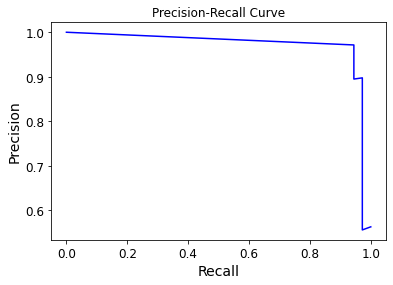

In [464]:
from sklearn.metrics import precision_recall_curve

prec, recl, thresholds = precision_recall_curve(y_val, y_val_prob, pos_label=1)
plt.plot(recl,prec,'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [465]:
print(thresholds)
print((np.min(y_val_prob),np.max(y_val_prob)))

[1.28459139e-36 5.19710220e-35 1.25287009e-34 1.86570014e-33
 2.27087336e-33 3.62931231e-32 1.21322515e-30 2.24472847e-26
 3.24582964e-26 4.13344554e-26 9.71920134e-25 1.11362961e-24
 1.15891642e-24 1.62125422e-23 6.88220557e-23 9.97793114e-23
 4.65666377e-22 1.10623242e-19 1.65707660e-16 4.05266048e-16
 1.93818740e-11 1.67348811e-10 1.87747840e-07 3.90876865e-06
 8.38504893e-06 2.59874217e-05 9.56649317e-04 9.62173661e-01
 9.99997901e-01 1.00000000e+00]
(3.7967738214030826e-132, 1.0)


**Questions:** *If this classifier would be used to make decisions in the hospital, which threshold would you choose? Is precision more important or recall? Do you think this classifier is good enough or does it need more research?*

You should consider this and decide for yourself, but realise that a False Negative is more serious than a False Positive, because if someone has a disease and is left untreated it could be very bad, whereas a healthy person who is told they have a disease will normally undergo more tests and then find out that it was a False Positive. Depending on the disease and the clinical pathway, there may be unnecessary treatment and stress involved for those that are in the False Positive group, but those that are in the False Negative group miss out on earlier treatment, and this can often have fatal consequences.

# Decision Tree

In [482]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_pl = Pipeline([ ??? ])
dt_pl.fit(X_train,y_train)
y_val_pred = dt_pl.predict(X_val)

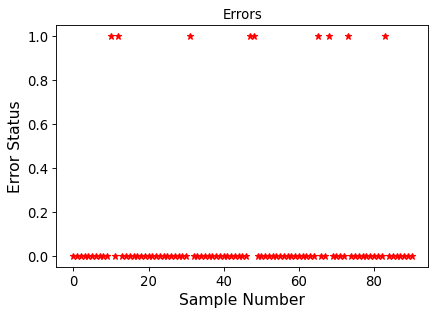

In [483]:
plt.plot(np.abs(y_val - y_val_pred),'r*')
plt.xlabel('Sample Number')
plt.ylabel('Error Status')
plt.title('Errors')
plt.show()

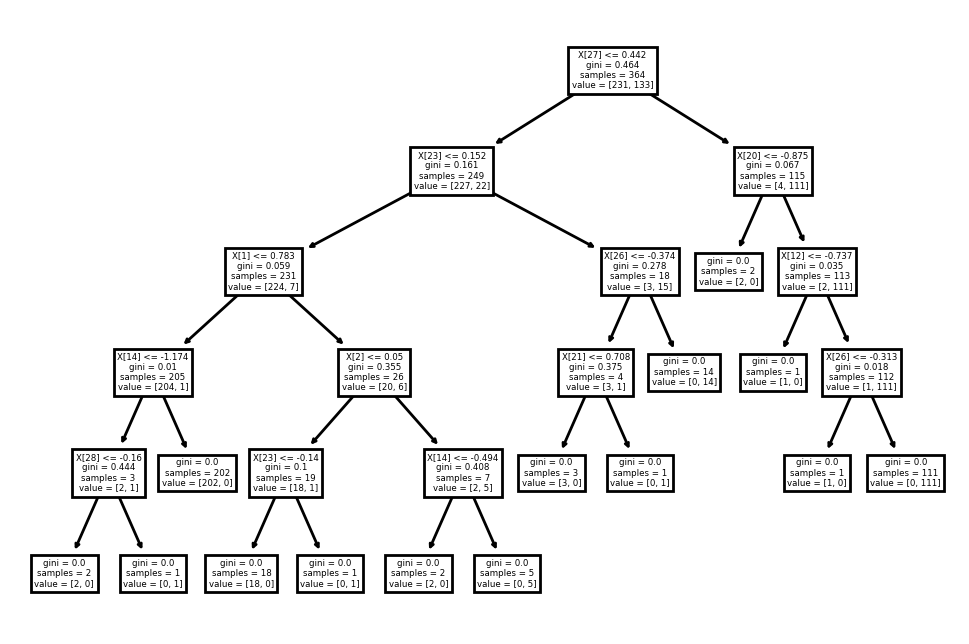

In [484]:
plt.rcParams['figure.dpi'] = 200
dummy = plot_tree(dt_pl['dt'])

**Question:** *What do each of the components (nodes, branches, thresholds) of the decision tree mean?*

You should be able to answer this on the basis of what was in the lecture. Note that feature numbers in each decision node are expressed as X[n]<=threshold

In [485]:
plt.rcParams['figure.dpi'] = 80

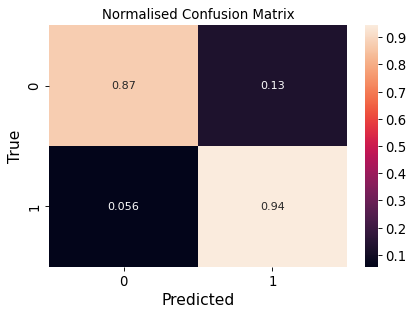

In [486]:
cmat = ???(y_true=y_val, y_pred=y_val_pred, ???)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix')
plt.show()

In [487]:
dt_acc = accuracy_score(y_true = ???, y_pred = y_val_pred)
print(f'Accuracy for Decision Tree is {dt_acc}')

Accuracy for Decision Tree is 0.9010989010989011


In [488]:
prec = precision_score(y_true = ???, y_pred = y_val_pred)
recl = recall_score(y_true = ???, y_pred = y_val_pred)
print(f'Precision & Recall are {prec} and {recl}')

Precision & Recall are 0.8292682926829268 and 0.9444444444444444


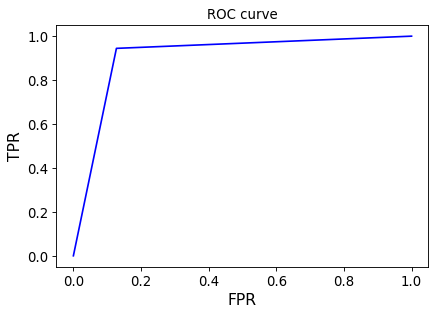

In [489]:
fpr, tpr, thresholds = ???(y_val, y_val_pred, pos_label=1)
plt.plot(fpr,tpr,'b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [490]:
print(thresholds)

[2. 1. 0.]


**Questions:** *Why are there so few points in the ROC curve?  Does it still show useful information?*

You can see that there are only three points (two end points and one intermediate point) but it still indicates the single useful operating point and its associated performance values.

In [491]:
auc_dt = auc(fpr,tpr)
print(f'AUC for Decision Tree classifier is {auc_dt}')

AUC for Decision Tree classifier is 0.9085858585858586


**Questions:** *How does the decision tree compare to the SGD linear model?  List 2 pros and 2 cons of each approach.*

AUC is 0.97 for the SGD linear model and 0.909 for the Decision Tree.  The confusion matrix tells a similar story.  Although SGD has better performance, the decision tree is more interpretable.  Can you think of other pros and cons?

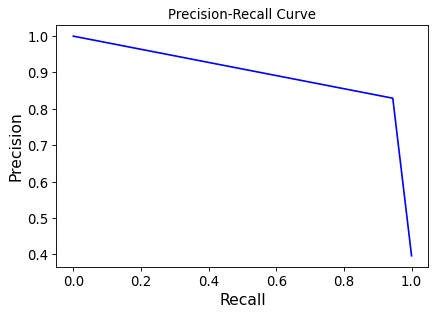

In [492]:
prec, recl, thresholds = precision_recall_curve(y_val, y_val_pred, pos_label=1)
plt.plot(recl,prec,'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Model selection

**Question:** *What do you think would be a good performance metric to use in this case, and why?  Choose one to work with here.*

A good answer here will depend on what you think is most important in the context of the task. If we want to try and supress False Negatives primarily then it would be good to choose an option with a good Recall, but still with acceptable Precision.  Based on the Precision-Recall curves, I would personally choose the SGD, with an operating point nearest to the top right. Looking at the class predictions (y_val_pred) as opposed to the probabilities (y_val_prob) shows that it is already choosing a good operating point, as shown also by the confusion matrices.

In [493]:
print(f'Comparison based on AUC is {auc_sgd} vs {auc_dt} for SGD vs Decision Tree')

Comparison based on AUC is 0.9752525252525253 vs 0.9085858585858586 for SGD vs Decision Tree


In [494]:
print(f'Comparison based on accuracy is {sgd_acc} vs {dt_acc} for SGD vs Decision Tree')

Comparison based on accuracy is 0.9560439560439561 vs 0.9010989010989011 for SGD vs Decision Tree


In [495]:
# Choosing SGD
bestmod = sgd_pl

In [496]:
bestmod.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((???,???)))
y_test_pred = bestmod.predict(???)

In [497]:
fpr, tpr, thresholds = ???(y_test, y_test_pred, pos_label=1)
auc_bm = auc(fpr, tpr)
acc_bm = accuracy_score(y_test, y_test_pred)
print(f'Final scores on Test set are: AUC = {auc_bm} and Accuracy = {acc_bm}')
print(f'For comparison, scores on Validation set are: AUC = {auc_sgd} and Accuracy = {sgd_acc}')

Final scores on Test set are: AUC = 0.9556174254831313 and Accuracy = 0.956140350877193
For comparison, scores on Validation set are: AUC = 0.9752525252525253 and Accuracy = 0.9560439560439561


**Question:** *What would it mean if there was a big difference between the performance scores on the validation and test datasets?*

These scores are quite similar and a big difference would not be expected in this case. The validation performance will typically be biased to be higher than it should, based on that fact that it was used to choose the best method, but for a small number of comparisons it would not normally be a large bias. If you do see a large difference then it might either be due to chance, or it may be due to a bug, so it is worth double-checking your code, looking more closely at the results and/or trying another random splitting.